<a href="https://colab.research.google.com/github/hafizhabdurrahman/Tesis/blob/main/LightGBM_KDDCUP99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import dari drive
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt

# Multiclass data


In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/dataset/KDDCUP99/kddcup99_csv.csv')
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [ ]:
print('Null values in dataset are',len(data[data.isnull().any(1)]))

Null values in dataset are 0


In [ ]:
data.shape

(494020, 42)

In [ ]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [191]:
data_clean = data.drop_duplicates(subset=data.columns, keep='first')
data_clean.shape

(145585, 42)

In [192]:
data_clean["protocol_type"] =data_clean["protocol_type"].astype('category')
data_clean["service"] = data_clean["service"].astype('category')
data_clean["flag"] = data_clean["flag"].astype('category')
data_clean["label"] = data_clean["label"].astype('category')
data_clean.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

duration                          int64
protocol_type                  category
service                        category
flag                           category
src_bytes                         int64
dst_bytes                         int64
land                              int64
wrong_fragment                    int64
urgent                            int64
hot                               int64
num_failed_logins                 int64
logged_in                         int64
lnum_compromised                  int64
lroot_shell                       int64
lsu_attempted                     int64
lnum_root                         int64
lnum_file_creations               int64
lnum_shells                       int64
lnum_access_files                 int64
lnum_outbound_cmds                int64
is_host_login                     int64
is_guest_login                    int64
count                             int64
srv_count                         int64
serror_rate                     float64


In [193]:
dict_service = dict(enumerate(data_clean["service"].cat.categories))
dict_protocol_type = dict(enumerate(data_clean["protocol_type"].cat.categories))
#dict_label = dict(enumerate(data_clean["label"].cat.categories))
dict_flag = dict(enumerate(data_clean["flag"].cat.categories))

In [194]:
data_clean["protocol_type"] =data_clean["protocol_type"].cat.codes
data_clean["service"] = data_clean["service"].cat.codes
data_clean["flag"] = data_clean["flag"].cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [195]:
dict_label

{0: 'back',
 1: 'buffer_overflow',
 2: 'ftp_write',
 3: 'guess_passwd',
 4: 'imap',
 5: 'ipsweep',
 6: 'land',
 7: 'loadmodule',
 8: 'multihop',
 9: 'neptune',
 10: 'nmap',
 11: 'normal',
 12: 'perl',
 13: 'phf',
 14: 'pod',
 15: 'portsweep',
 16: 'rootkit',
 17: 'satan',
 18: 'smurf',
 19: 'spy',
 20: 'teardrop',
 21: 'warezclient',
 22: 'warezmaster'}

In [196]:
data_clean["label"] = data_clean["label"].cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [198]:
temp = []
j = 0
k = 0
for i in data_clean["label"]:
    if i == 11:
      i = 0
    elif (i == 0) or (i == 6)or (i == 9) or (i==14) or (i ==18) or (i==20):
      i = 1
    elif (i == 5) or (i == 10)or (i == 15) or (i==17):
      i = 2
    elif (i == 1) or (i == 7)or (i == 12) or (i==16):
      i = 4
    else:
      i = 3
    temp.append(i)

In [199]:
data_clean.drop(columns=["label"], inplace=True)
data_clean["label"] = temp

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [200]:
dict_label = {
    0:"normal",
    1:"dos",
    2:"probe",
    3:"r2l",
    4:"u2r"
}

In [202]:
data_clean["label"]

0         0
1         0
2         0
3         0
4         0
         ..
494015    0
494016    0
494017    0
494018    0
494019    0
Name: label, Length: 145585, dtype: int64

In [203]:
data_clean["protocol_type"] =data_clean["protocol_type"].astype('int')
data_clean["service"] = data_clean["service"].astype('int')
data_clean["flag"] = data_clean["flag"].astype('int')
data_clean["label"] = data_clean["label"].astype('int')
data_clean.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

duration                         int64
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
lnum_compromised                 int64
lroot_shell                      int64
lsu_attempted                    int64
lnum_root                        int64
lnum_file_creations              int64
lnum_shells                      int64
lnum_access_files                int64
lnum_outbound_cmds               int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [ ]:
#data_clean["protocol_type"] =data_clean["protocol_type"].astype('string')
#data_clean["service"] = data_clean["service"].astype('string')
#data_clean["flag"] = data_clean["flag"].astype('string')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [13]:
data_clean["label"]

0         11
1         11
2         11
3         11
4         11
          ..
494015    11
494016    11
494017    11
494018    11
494019    11
Name: label, Length: 145585, dtype: int64

In [204]:
X = data_clean.drop(columns=["label"])
Y = data_clean["label"]


In [205]:
#nama = data_clean.drop(columns=["label", "protocol_type", "service", "flag"])
nama2 = data_clean.drop(columns=["label"])

In [206]:
fitur = []
for i in nama2.columns:
  fitur.append(i)
fitur

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'lnum_compromised',
 'lroot_shell',
 'lsu_attempted',
 'lnum_root',
 'lnum_file_creations',
 'lnum_shells',
 'lnum_access_files',
 'lnum_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)

(101909, 41)
(43676, 41)


In [208]:
#frame = {"protocol_type": data["protocol_type"], 
#         'service': data["service"], 
#         "flag": data["flag"]}
#data_cat = pd.DataFrame(frame)
X_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
361408,0,1,45,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,5,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255,11,0.04,0.07,0.00,0.00,1.00,1.0,0.0,0.0
85540,0,1,22,9,151,3836,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,7,225,1.00,0.00,0.14,0.01,0.00,0.0,0.0,0.0
37646,0,1,22,9,209,339,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,12,14,0.0,0.0,0.0,0.0,1.00,0.00,0.21,32,255,1.00,0.00,0.03,0.02,0.00,0.0,0.0,0.0
86362,25,1,18,9,328,1072,0,0,0,6,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,91,29,0.32,0.07,0.01,0.00,0.01,0.0,0.0,0.0
90841,0,1,22,9,216,3750,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.00,0.00,0.00,111,255,1.00,0.00,0.01,0.01,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451859,0,1,19,9,194,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,186,44,0.24,0.03,0.24,0.00,0.00,0.0,0.0,0.0
455951,0,1,19,9,748,0,0,0,0,0,0,1,0,0,0,9,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,205,35,0.17,0.02,0.17,0.00,0.00,0.0,0.0,0.0
24215,0,1,22,9,162,10529,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.00,0.00,0.00,37,255,1.00,0.00,0.03,0.04,0.00,0.0,0.0,0.0
22379,0,1,22,9,216,767,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0


In [19]:
lgbm_train = lgb.Dataset(X_train, Y_train, free_raw_data=False)#, feature_name=fitur, categorical_feature=["protocol_type", "service", "flag"])

In [20]:
lgbm_train.construct()

In [21]:
lgbm_train.set_categorical_feature(["protocol_type", "service", "flag"])
lgbm_train.construct()

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['flag', 'protocol_type', 'service']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


In [22]:
lgbm_train.set_feature_name(fitur)
lgbm_train.construct()

In [23]:
lgbm_train.get_data()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
361408,0,1,45,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,5,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255,11,0.04,0.07,0.00,0.00,1.00,1.0,0.0,0.0
85540,0,1,22,9,151,3836,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,7,225,1.00,0.00,0.14,0.01,0.00,0.0,0.0,0.0
37646,0,1,22,9,209,339,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,12,14,0.0,0.0,0.0,0.0,1.00,0.00,0.21,32,255,1.00,0.00,0.03,0.02,0.00,0.0,0.0,0.0
86362,25,1,18,9,328,1072,0,0,0,6,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,91,29,0.32,0.07,0.01,0.00,0.01,0.0,0.0,0.0
90841,0,1,22,9,216,3750,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.00,0.00,0.00,111,255,1.00,0.00,0.01,0.01,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451859,0,1,19,9,194,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,186,44,0.24,0.03,0.24,0.00,0.00,0.0,0.0,0.0
455951,0,1,19,9,748,0,0,0,0,0,0,1,0,0,0,9,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,205,35,0.17,0.02,0.17,0.00,0.00,0.0,0.0,0.0
24215,0,1,22,9,162,10529,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.00,0.00,0.00,37,255,1.00,0.00,0.03,0.04,0.00,0.0,0.0,0.0
22379,0,1,22,9,216,767,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0


In [209]:
parameters = {
    #"num_leaves":8,
    "n_estimators": 3,
    "max_depth":3,
    "random_state": 43
}

In [25]:
model = lgb.train(parameters,train_set = lgbm_train)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


In [236]:
clf = lgb.LGBMClassifier(#boosting_type="goss", 
                         #n_estimators =  3, 
                         #max_depth = 3, 

                         random_state = 43, 
                         objective="multiclass")

In [237]:
model2 = clf.fit(X_train, Y_train, feature_name=fitur, categorical_feature=["protocol_type", "service", "flag"])

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['flag', 'protocol_type', 'service']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


In [238]:
pred = model.predict(X_test, raw_score=True)
pred2 = model2.predict(X_test)

In [239]:
pred2_prob = model2.predict_proba(X_test)

In [240]:
pred2_prob_raw = model2.predict_proba(X_test, raw_score=True)

In [250]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

precision = precision_score(Y_test, pred2, average="weighted")
acc = accuracy_score(Y_test, pred2)
report = classification_report(Y_test, pred2)

print("Precision  =",precision)
print("Accuracy   =",acc)
print("")
print(report)

Precision  = 0.9871280659082851
Accuracy   = 0.9855756021613701

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     26384
           1       0.99      0.99      0.99     16344
           2       0.85      0.83      0.84       625
           3       0.59      0.78      0.67       302
           4       0.15      0.38      0.21        21

    accuracy                           0.99     43676
   macro avg       0.71      0.80      0.74     43676
weighted avg       0.99      0.99      0.99     43676



In [252]:
from sklearn.metrics import multilabel_confusion_matrix

multi_cm = multilabel_confusion_matrix(Y_test, pred2, labels=clf.classes_)
print(multi_cm)

[[[17118   174]
  [  332 26052]]

 [[27179   153]
  [  115 16229]]

 [[42962    89]
  [  105   520]]

 [[43206   168]
  [   65   237]]

 [[43609    46]
  [   13     8]]]


In [257]:
normal_cm = multi_cm[0,]
dos_cm    = multi_cm[1,]
probe_cm  = multi_cm[2,]
r2l_cm    = multi_cm[3,]
u2r_cm    = multi_cm[4,]

0.9884146899899258

In [287]:
i = 0
for i in range(0,5):
  tn, fp, fn, tp = multi_cm[i,].ravel()
  acc = (tp + tn)/(tn + fp + fn + tp)
  tpr = (tp) / (tp + fn)
  fpr = (fp) / (tp + fn)
  if i == 0:
    print("Akurasi Normal =",acc)
    print("TPR Normal     =",tpr)
    print("FPR Normal     =",fpr)
  elif i == 1:
    print("Akurasi Dos =",acc)
    print("TPR Dos     =",tpr)
    print("FPR Dos     =",fpr)
  elif i == 2:
    print("Akurasi Probe =",acc)
    print("TPR Probe     =",tpr)
    print("FPR Probe     =",fpr)
  elif i == 3:
    print("Akurasi R2L =",acc)
    print("TPR R2L     =",tpr)
    print("FPR R2L     =",fpr)
  elif i == 4:
    print("Akurasi U2R =",acc)
    print("TPR U2R     =",tpr)
    print("FPR U2R     =",fpr)
  print("")

Akurasi Normal = 0.9884146899899258
TPR Normal     = 0.9874166161309885
FPR Normal     = 0.006594906003638569

Akurasi Dos = 0.993863906951186
TPR Dos     = 0.9929637787567303
FPR Dos     = 0.009361233480176211

Akurasi Probe = 0.9955582013004854
TPR Probe     = 0.832
FPR Probe     = 0.1424

Akurasi R2L = 0.9946652623866654
TPR R2L     = 0.7847682119205298
FPR R2L     = 0.5562913907284768

Akurasi U2R = 0.9986491436944775
TPR U2R     = 0.38095238095238093
FPR U2R     = 2.1904761904761907



In [288]:
clf.feature_importances_

array([ 791,  299,  254,   74, 1989,  931,    0,  170,    0,  358,   45,
         99,   86,   61,    0,  100,  223,    3,   87,    0,    0,   15,
        985,  633,  176,   82,  183,   72,  405,  460,  178,  873, 1271,
        637,  781,  752,  697,  347,  195,  485,  203])

In [246]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, pred2, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

In [256]:
cm

array([[26052,   116,    56,   133,    27],
       [   54, 16229,    28,    24,     9],
       [   67,    25,   520,     7,     6],
       [   47,    12,     2,   237,     4],
       [    6,     0,     3,     4,     8]])

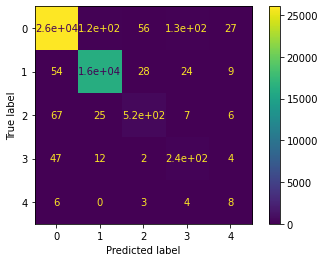

In [247]:
disp.plot()

In [190]:
dict_label

{0: 'back',
 1: 'buffer_overflow',
 2: 'ftp_write',
 3: 'guess_passwd',
 4: 'imap',
 5: 'ipsweep',
 6: 'land',
 7: 'loadmodule',
 8: 'multihop',
 9: 'neptune',
 10: 'nmap',
 11: 'normal',
 12: 'perl',
 13: 'phf',
 14: 'pod',
 15: 'portsweep',
 16: 'rootkit',
 17: 'satan',
 18: 'smurf',
 19: 'spy',
 20: 'teardrop',
 21: 'warezclient',
 22: 'warezmaster'}

In [174]:
df_tree = model.trees_to_dataframe()

AttributeError: ignored

In [158]:
df_tree

,tree_index,node_depth,node_index,left_child,right_child,parent_index,split_feature,split_gain,threshold,decision_type,missing_direction,missing_type,value,weight,count
0,0,1,0-S0,0-S3,0-S1,None,same_srv_rate,86389.796875,0.315,<=,left,None,10.389200,0,101909
1,0,2,0-S3,0-S6,0-S5,0-S0,dst_host_diff_srv_rate,35398.500000,0.155,<=,left,None,10.266300,36635,36635
2,0,3,0-S6,0-L0,0-L7,0-S3,src_bytes,800.836975,1e-35,<=,left,None,10.251400,35819,35819
3,0,4,0-L0,None,None,0-S6,None,NaN,None,None,None,None,10.250503,35683,35683
4,0,4,0-L7,None,None,0-S6,None,NaN,None,None,None,None,10.493627,136,136
5,0,3,0-S5,0-L4,0-L6,0-S3,src_bytes,4481.669922,46.5,<=,left,None,10.917500,816,816
6,0,4,0-L4,None,None,0-S5,None,NaN,None,None,None,None,11.035061,652,652
7,0,4,0-L6,None,None,0-S5,None,NaN,None,None,None,None,10.450245,164,164
8,0,2,0-S1,0-S2,0-S4,0-S0,lnum_compromised,70943.000000,1e-35,<=,left,None,10.458100,65274,65274
9,0,3,0-S2,0-L1,0-L3,0-S1,wrong_fragment,50309.199219,2,<=,left,None,10.468700,64607,64607


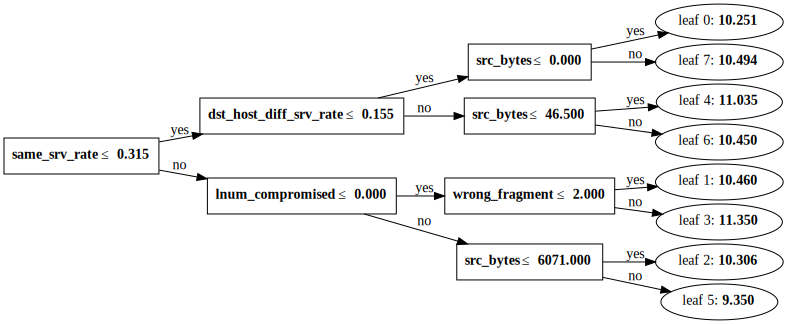

In [159]:
lgb.create_tree_digraph(model, tree_index=0)

In [89]:
model.get_leaf_output(0, 0)

7.186699899800442

In [94]:
Y_train

361408    5
85540     9
37646     9
86362     9
90841     9
         ..
451859    9
455951    9
24215     9
22379     9
39552     9
Name: label, Length: 101909, dtype: int8

# Binary data



In [79]:
data2 = pd.read_csv('/content/gdrive/MyDrive/dataset/KDDCUP99/kddcup99_csv.csv')
data2.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [80]:
data_clean2 = data2.drop_duplicates(subset=data2.columns, keep='first')
data_clean2.shape

(145585, 42)

In [81]:
data_clean2["protocol_type"] =data_clean2["protocol_type"].astype('category')
data_clean2["service"] = data_clean2["service"].astype('category')
data_clean2["flag"] = data_clean2["flag"].astype('category')
data_clean2["label"] = data_clean2["label"].astype('category')
data_clean.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

duration                         int64
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
lnum_compromised                 int64
lroot_shell                      int64
lsu_attempted                    int64
lnum_root                        int64
lnum_file_creations              int64
lnum_shells                      int64
lnum_access_files                int64
lnum_outbound_cmds               int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [82]:
data_clean2["label"].cat.categories

Index(['back', 'buffer_overflow', 'ftp_write', 'guess_passwd', 'imap',
       'ipsweep', 'land', 'loadmodule', 'multihop', 'neptune', 'nmap',
       'normal', 'perl', 'phf', 'pod', 'portsweep', 'rootkit', 'satan',
       'smurf', 'spy', 'teardrop', 'warezclient', 'warezmaster'],
      dtype='object')

In [83]:
dict_service2 = dict(enumerate(data_clean2["service"].cat.categories))
dict_protocol_type2 = dict(enumerate(data_clean2["protocol_type"].cat.categories))
dict_label2 = {
    0:"normal",
    1:"attack",
}
dict_flag2 = dict(enumerate(data_clean2["flag"].cat.categories))

In [84]:
data_clean2["protocol_type"] =data_clean2["protocol_type"].cat.codes
data_clean2["service"] = data_clean2["service"].cat.codes
data_clean2["flag"] = data_clean2["flag"].cat.codes
data_clean2["label"] = data_clean2["label"].cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [85]:
data_clean2["protocol_type"] =data_clean2["protocol_type"].astype('int')
data_clean2["service"] = data_clean2["service"].astype('int')
data_clean2["flag"] = data_clean2["flag"].astype('int')
data_clean2["label"] = data_clean2["label"].astype('int')
data_clean2.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

duration                         int64
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
lnum_compromised                 int64
lroot_shell                      int64
lsu_attempted                    int64
lnum_root                        int64
lnum_file_creations              int64
lnum_shells                      int64
lnum_access_files                int64
lnum_outbound_cmds               int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [86]:
temp = []
j = 0
k = 0
for i in data_clean2["label"]:
    if i == 11:
      i = 0
      k = k + 1
    else:
      i = 1
      j = j + 1
    temp.append(i)
#temp

In [87]:
data_clean2.drop(columns=["label"], inplace=True)
data_clean2["label"] = temp

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [89]:
data_clean2["label"]

0         0
1         0
2         0
3         0
4         0
         ..
494015    0
494016    0
494017    0
494018    0
494019    0
Name: label, Length: 145585, dtype: int64

In [91]:
dict_label2

{0: 'normal', 1: 'attack'}

In [94]:
X2 = data_clean2.drop(columns=["label"])
Y2 = data_clean2["label"]

In [143]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size = 0.3, random_state = 5)
print(X_train2.shape)
print(X_test2.shape)

(101909, 41)
(43676, 41)


In [175]:
clf2 = lgb.LGBMClassifier(boosting_type="goss", 
                          #n_estimators =  3, 
                          num_leaves = 8, 
                          max_depth = 3, 
                          random_state = 43, 
                          objective="binary",
                          silent=False)

In [176]:
model3 = clf2.fit(X_train2, Y_train2, feature_name=fitur, categorical_feature=["protocol_type", "service", "flag"])

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['flag', 'protocol_type', 'service']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


In [177]:
pred3 = model3.predict(X_test2)

In [178]:
pred3_prob = model3.predict_proba(X_test2)

In [181]:
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

auc = roc_auc_score(Y_test2, pred3)
precision = precision_score(Y_test2, pred3)
recall = recall_score(Y_test2, pred3)
fmeasure = f1_score(Y_test2, pred3)

print("Precision  =",precision)
print("ROC AUC    =",auc)
print("Recall     =",recall)
print("F-Measure  =",fmeasure)

Precision  = 0.9991888290167449
ROC AUC    = 0.9983756777427126
Recall     = 0.9972819801064076
F-Measure  = 0.9982344939364997


In [189]:
dict_label

{0: 'back',
 1: 'buffer_overflow',
 2: 'ftp_write',
 3: 'guess_passwd',
 4: 'imap',
 5: 'ipsweep',
 6: 'land',
 7: 'loadmodule',
 8: 'multihop',
 9: 'neptune',
 10: 'nmap',
 11: 'normal',
 12: 'perl',
 13: 'phf',
 14: 'pod',
 15: 'portsweep',
 16: 'rootkit',
 17: 'satan',
 18: 'smurf',
 19: 'spy',
 20: 'teardrop',
 21: 'warezclient',
 22: 'warezmaster'}